In [1]:
import urllib.request, urllib.parse, urllib.error
import json
import csv
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import codecs
recovered_conn = sqlite3.connect('recovered_cases.sqlite')
recovered_cur = recovered_conn.cursor()

In [2]:
recovered_url = "https://coronavirus-tracker-api.herokuapp.com/recovered"
recovered_uh=urllib.request.urlopen(recovered_url)
recovered_data=recovered_uh.read().decode()
recovered_data=json.loads(recovered_data)
print(recovered_data)

{'locations': [{'country': 'Afghanistan', 'country_code': 'AF', 'province': '', 'coordinates': {'lat': '33.93911', 'long': '67.709953'}, 'history': {'1/22/20': 0, '1/23/20': 0, '1/24/20': 0, '1/25/20': 0, '1/26/20': 0, '1/27/20': 0, '1/28/20': 0, '1/29/20': 0, '1/30/20': 0, '1/31/20': 0, '2/1/20': 0, '2/2/20': 0, '2/3/20': 0, '2/4/20': 0, '2/5/20': 0, '2/6/20': 0, '2/7/20': 0, '2/8/20': 0, '2/9/20': 0, '2/10/20': 0, '2/11/20': 0, '2/12/20': 0, '2/13/20': 0, '2/14/20': 0, '2/15/20': 0, '2/16/20': 0, '2/17/20': 0, '2/18/20': 0, '2/19/20': 0, '2/20/20': 0, '2/21/20': 0, '2/22/20': 0, '2/23/20': 0, '2/24/20': 0, '2/25/20': 0, '2/26/20': 0, '2/27/20': 0, '2/28/20': 0, '2/29/20': 0, '3/1/20': 0, '3/2/20': 0, '3/3/20': 0, '3/4/20': 0, '3/5/20': 0, '3/6/20': 0, '3/7/20': 0, '3/8/20': 0, '3/9/20': 0, '3/10/20': 0, '3/11/20': 0, '3/12/20': 0, '3/13/20': 0, '3/14/20': 0, '3/15/20': 0, '3/16/20': 1, '3/17/20': 1, '3/18/20': 1, '3/19/20': 1, '3/20/20': 1, '3/21/20': 1, '3/22/20': 1, '3/23/20': 1, '

In [3]:
recovered_cur.execute('DROP TABLE IF EXISTS Locations')
recovered_cur.execute('''CREATE TABLE Locations(country TEXT,province TEXT,lat NUMERIC NOT NULL,long NUMERIC NOT NULL,latest NUMERIC)''')

In [4]:
for i in recovered_data['locations']:
    recovered_cur.execute('''INSERT INTO Locations(country,province,lat,long,latest) VALUES (?,?,?,?,?)''',(i['country'],i['province'],i['coordinates']['lat'],i['coordinates']['long'],i['latest']))
recovered_conn.commit()

In [5]:
recovered_cur.execute('SELECT lat ,long FROM Locations WHERE latest >= 50000')
fhand = codecs.open('recovered_cases.js', 'w', "utf-8")
fhand.write("myData = [\n")
count = 0

for place_row in recovered_cur.fetchall():
    lat= place_row[0]
    long= place_row[1]
    print(lat,long)
    count=count+1
    if count>1:
        fhand.write(",\n")
    output="["+str(lat)+","+str(long)+"]"
    fhand.write(output)
fhand.write("\n];\n")
recovered_cur.close()
fhand.close()

28.0339 1.6596
-38.4161 -63.6167
40.0691 45.0382
47.5162 14.5501
40.1431 47.5769
26.0275 50.55
23.685 90.3563
53.7098 27.9534
-16.2902 -63.5887
43.9159 17.6791
-14.235 -51.9253
42.7339 25.4858
21.9162 95.956
56.1304 -106.3468
-35.6751 -71.543
30.9756 112.2707
4.5709 -74.2973
9.7489 -83.7534
45.1 15.2
49.8175 15.473
56.2639 9.5018
18.7357 -70.1627
-1.8312 -78.1834
26.820553 30.802498
9.145 40.4897
46.2276 2.2137
42.3154 43.3569
51.165691 10.451526
7.9465 -1.0232
39.0742 21.8243
15.7835 -90.2308
15.2 -86.2419
47.1625 19.5033
20.593684 78.96288
-0.7893 113.9213
32.427908 53.688046
33.223191 43.679291
31.046051 34.851612
41.87194 12.56738
36.204824 138.252924
31.24 36.51
48.0196 66.9237
-0.0236 37.9062
35.907757 127.766922
42.602636 20.902977
29.31166 47.481766
41.20438 74.766098
33.8547 35.8623
26.3351 17.228331
55.1694 23.8813
4.210484 101.975766
23.6345 -102.5528
47.4116 28.3699
42.708678 19.37439
31.7917 -7.0926
28.1667 84.25
9.082 8.6753
41.6086 21.7453
21.512583 55.923255
30.3753 69.

In [6]:
import pandas as pd
import json
from pandas.io.json import json_normalize
recovered_df = json_normalize(recovered_data['locations'])
print(recovered_df.columns)

D:\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  after removing the cwd from sys.path.


Index(['country', 'country_code', 'province', 'latest', 'coordinates.lat',
       'coordinates.long', 'history.1/22/20', 'history.1/23/20',
       'history.1/24/20', 'history.1/25/20',
       ...
       'history.1/16/21', 'history.1/17/21', 'history.1/18/21',
       'history.1/19/21', 'history.1/20/21', 'history.1/21/21',
       'history.1/22/21', 'history.1/23/21', 'history.1/24/21',
       'history.1/25/21'],
      dtype='object', length=376)


In [7]:
recovered_df.to_csv('recovered.csv', index=False)

In [8]:
recovered_cases=pd.read_csv('recovered.csv')

In [9]:
recovered_cases

country country_code province  latest  coordinates.lat  \
0           Afghanistan           AF      NaN   47365        33.939110   
1               Albania           AL      NaN   44291        41.153300   
2               Algeria           DZ      NaN   72143        28.033900   
3               Andorra           AD      NaN    8724        42.506300   
4                Angola           AO      NaN   17327       -11.202700   
..                  ...          ...      ...     ...              ...   
253             Vietnam           VN      NaN    1425        14.058324   
254  West Bank and Gaza           PS      NaN  145639        31.952200   
255               Yemen           YE      NaN    1424        15.552727   
256              Zambia           ZM      NaN   38639       -13.133897   
257            Zimbabwe           ZW      NaN   22877       -19.015438   

     coordinates.long  history.1/22/20  history.1/23/20  history.1/24/20  \
0           67.709953                0                0                0   
1           20.168300                0                0                0   
2            1.659600                0                0                0   
3            1.521800                0                0                0   
4           17.873900                0                0                0   
..                ...              ...              ...              ...   
253        108.277199                0                0                0   
254         35.233200                0                0                0   
255         48.516388                0                0                0   
256         27.849332                0                0                0   
257         29.154857                0                0                0   

     history.1/25/20  ...  history.1/16/21  history.1/17/21  history.1/18/21  \
0                  0  ...            45465            45868            46359   
1                  0  ...            40090            40453            40870   
2                  0  ...            70373            70554            70747   
3                  0  ...             8116             8154             8154   
4                  0  ...            16225            16347            16677   
..               ...  ...              ...              ...              ...   
253                0  ...             1380             1380             1402   
254                0  ...           138495           139131           140075   
255                0  ...             1419             1419             1421   
256                0  ...            25106            26159            27327   
257                0  ...            15872            16512            17372   

     history.1/19/21  history.1/20/21  history.1/21/21  history.1/22/21  \
0              46554            46759            46887            46912   
1              41464            41969            42426            42895   
2              70933            71127            71343            71552   
3               8349             8399             8474             8537   
4              16822            16921            17176            17223   
..               ...              ...              ...              ...   
253             1402             1406             1411             1411   
254           140914           142004           142819           143611   
255             1422             1423             1423             1423   
256            28066            29775            31522            32667   
257            18110            19253            19569            21080   

     history.1/23/21  history.1/24/21  history.1/25/21  
0              46943            47298            47365  
1              43384            43890            44291  
2              71755            71945            72143  
3               8588             8652             8724  
4              17249            17266            17327  
..        

In [10]:
confirmed_conn = sqlite3.connect('confirmed_cases.sqlite')
confirmed_cur = confirmed_conn.cursor()

In [11]:
confirmed_url = "https://coronavirus-tracker-api.herokuapp.com/confirmed"
confirmed_uh=urllib.request.urlopen(confirmed_url)
confirmed_data=confirmed_uh.read().decode()
confirmed_data=json.loads(confirmed_data)
print(confirmed_data)

{'locations': [{'country': 'Afghanistan', 'country_code': 'AF', 'province': '', 'coordinates': {'lat': '33.93911', 'long': '67.709953'}, 'history': {'1/22/20': 0, '1/23/20': 0, '1/24/20': 0, '1/25/20': 0, '1/26/20': 0, '1/27/20': 0, '1/28/20': 0, '1/29/20': 0, '1/30/20': 0, '1/31/20': 0, '2/1/20': 0, '2/2/20': 0, '2/3/20': 0, '2/4/20': 0, '2/5/20': 0, '2/6/20': 0, '2/7/20': 0, '2/8/20': 0, '2/9/20': 0, '2/10/20': 0, '2/11/20': 0, '2/12/20': 0, '2/13/20': 0, '2/14/20': 0, '2/15/20': 0, '2/16/20': 0, '2/17/20': 0, '2/18/20': 0, '2/19/20': 0, '2/20/20': 0, '2/21/20': 0, '2/22/20': 0, '2/23/20': 0, '2/24/20': 1, '2/25/20': 1, '2/26/20': 1, '2/27/20': 1, '2/28/20': 1, '2/29/20': 1, '3/1/20': 1, '3/2/20': 1, '3/3/20': 2, '3/4/20': 4, '3/5/20': 4, '3/6/20': 4, '3/7/20': 4, '3/8/20': 5, '3/9/20': 7, '3/10/20': 8, '3/11/20': 11, '3/12/20': 12, '3/13/20': 13, '3/14/20': 15, '3/15/20': 16, '3/16/20': 18, '3/17/20': 20, '3/18/20': 24, '3/19/20': 25, '3/20/20': 29, '3/21/20': 30, '3/22/20': 34, '3/

In [12]:
confirmed_cur.execute('DROP TABLE IF EXISTS Locations')
confirmed_cur.execute('''CREATE TABLE Locations(country TEXT,province TEXT,lat NUMERIC NOT NULL,long NUMERIC NOT NULL,latest NUMERIC)''')

In [13]:
for i in confirmed_data['locations']:
    confirmed_cur.execute('''INSERT INTO Locations(country,province,lat,long,latest) VALUES (?,?,?,?,?)''',(i['country'],i['province'],i['coordinates']['lat'],i['coordinates']['long'],i['latest']))
confirmed_conn.commit()

In [14]:
confirmed_cur.execute('SELECT lat ,long FROM Locations WHERE latest >= 100000')
fhand = codecs.open('confirmed_cases.js', 'w', "utf-8")
fhand.write("myData = [\n")
count = 0

for place_row in confirmed_cur.fetchall():
    lat= place_row[0]
    long= place_row[1]
    print(lat,long)
    count=count+1
    if count>1:
        fhand.write(",\n")
    output="["+str(lat)+","+str(long)+"]"
    fhand.write(output)
fhand.write("\n];\n")
confirmed_cur.close()
fhand.close()

28.0339 1.6596
-38.4161 -63.6167
40.0691 45.0382
47.5162 14.5501
40.1431 47.5769
26.0275 50.55
23.685 90.3563
53.7098 27.9534
50.8333 4.469936
-16.2902 -63.5887
43.9159 17.6791
-14.235 -51.9253
42.7339 25.4858
21.9162 95.956
53.9333 -116.5765
51.2538 -85.3232
52.9399 -73.5491
-35.6751 -71.543
4.5709 -74.2973
9.7489 -83.7534
45.1 15.2
49.8175 15.473
56.2639 9.5018
18.7357 -70.1627
-1.8312 -78.1834
26.820553 30.802498
9.145 40.4897
46.2276 2.2137
42.3154 43.3569
51.165691 10.451526
39.0742 21.8243
15.7835 -90.2308
15.2 -86.2419
47.1625 19.5033
20.593684 78.96288
-0.7893 113.9213
32.427908 53.688046
33.223191 43.679291
53.1424 -7.6921
31.046051 34.851612
41.87194 12.56738
36.204824 138.252924
31.24 36.51
48.0196 66.9237
-0.0236 37.9062
29.31166 47.481766
33.8547 35.8623
26.3351 17.228331
55.1694 23.8813
4.210484 101.975766
23.6345 -102.5528
47.4116 28.3699
31.7917 -7.0926
28.1667 84.25
52.1326 5.2913
9.082 8.6753
21.512583 55.923255
30.3753 69.3451
8.538 -80.7821
-23.4425 -58.4438
-9.19 -

In [15]:
confirmed_df = json_normalize(confirmed_data['locations'])
print(confirmed_df.columns)

D:\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


Index(['country', 'country_code', 'province', 'latest', 'coordinates.lat',
       'coordinates.long', 'history.1/22/20', 'history.1/23/20',
       'history.1/24/20', 'history.1/25/20',
       ...
       'history.1/16/21', 'history.1/17/21', 'history.1/18/21',
       'history.1/19/21', 'history.1/20/21', 'history.1/21/21',
       'history.1/22/21', 'history.1/23/21', 'history.1/24/21',
       'history.1/25/21'],
      dtype='object', length=376)


In [16]:
confirmed_df.to_csv('confirmed.csv', index=False)
confirmed_cases=pd.read_csv('confirmed.csv')

In [17]:
confirmed_cases

country country_code province  latest  coordinates.lat  \
0           Afghanistan           AF      NaN   54672        33.939110   
1               Albania           AL      NaN   72812        41.153300   
2               Algeria           DZ      NaN  105854        28.033900   
3               Andorra           AD      NaN    9596        42.506300   
4                Angola           AO      NaN   19476       -11.202700   
..                  ...          ...      ...     ...              ...   
268             Vietnam           VN      NaN    1549        14.058324   
269  West Bank and Gaza           PS      NaN  155884        31.952200   
270               Yemen           YE      NaN    2118        15.552727   
271              Zambia           ZM      NaN   46146       -13.133897   
272            Zimbabwe           ZW      NaN   31646       -19.015438   

     coordinates.long  history.1/22/20  history.1/23/20  history.1/24/20  \
0           67.709953                0                0                0   
1           20.168300                0                0                0   
2            1.659600                0                0                0   
3            1.521800                0                0                0   
4           17.873900                0                0                0   
..                ...              ...              ...              ...   
268        108.277199                0                2                2   
269         35.233200                0                0                0   
270         48.516388                0                0                0   
271         27.849332                0                0                0   
272         29.154857                0                0                0   

     history.1/25/20  ...  history.1/16/21  history.1/17/21  history.1/18/21  \
0                  0  ...            53938            53984            54062   
1                  0  ...            67216            67690            67982   
2                  0  ...           103611           103833           104092   
3                  0  ...             9038             9083             9083   
4                  0  ...            18765            18875            18926   
..               ...  ...              ...              ...              ...   
268                2  ...             1537             1537             1539   
269                0  ...           151569           152031           152555   
270                0  ...             2112             2112             2113   
271                0  ...            36074            37605            38207   
272                0  ...            26881            27203            27892   

     history.1/19/21  history.1/20/21  history.1/21/21  history.1/22/21  \
0              54141            54278            54403            54483   
1              68568            69238            69916            70655   
2             104341           104606           104852           105124   
3               9194             9308             9379             9416   
4              19011            19093            19177            19269   
..               ...              ...              ...              ...   
268             1540             1544             1546             1548   
269           153093           153590           154063           154557   
270             2115             2115             2115             2118   
271            39515            40949            42213            43333   
272            28675            29408            30047            30523   

     history.1/23/21  history.1/24/21  history.1/25/21  
0              54559            54595            54672  
1              71441            72274            72812  
2             105369           105596           105854  
3               9499             9549             9596  
4              19367            19399            19476  
..        

In [18]:
deaths_conn = sqlite3.connect('deaths_reported.sqlite')
deaths_cur = deaths_conn.cursor()

In [19]:
deaths_url = "https://coronavirus-tracker-api.herokuapp.com/deaths"
deaths_uh=urllib.request.urlopen(deaths_url)
deaths_data=deaths_uh.read().decode()
deaths_data=json.loads(deaths_data)
print(deaths_data)

{'locations': [{'country': 'Afghanistan', 'country_code': 'AF', 'province': '', 'coordinates': {'lat': '33.93911', 'long': '67.709953'}, 'history': {'1/22/20': 0, '1/23/20': 0, '1/24/20': 0, '1/25/20': 0, '1/26/20': 0, '1/27/20': 0, '1/28/20': 0, '1/29/20': 0, '1/30/20': 0, '1/31/20': 0, '2/1/20': 0, '2/2/20': 0, '2/3/20': 0, '2/4/20': 0, '2/5/20': 0, '2/6/20': 0, '2/7/20': 0, '2/8/20': 0, '2/9/20': 0, '2/10/20': 0, '2/11/20': 0, '2/12/20': 0, '2/13/20': 0, '2/14/20': 0, '2/15/20': 0, '2/16/20': 0, '2/17/20': 0, '2/18/20': 0, '2/19/20': 0, '2/20/20': 0, '2/21/20': 0, '2/22/20': 0, '2/23/20': 0, '2/24/20': 0, '2/25/20': 0, '2/26/20': 0, '2/27/20': 0, '2/28/20': 0, '2/29/20': 0, '3/1/20': 0, '3/2/20': 0, '3/3/20': 0, '3/4/20': 0, '3/5/20': 0, '3/6/20': 0, '3/7/20': 0, '3/8/20': 0, '3/9/20': 0, '3/10/20': 0, '3/11/20': 0, '3/12/20': 0, '3/13/20': 0, '3/14/20': 0, '3/15/20': 0, '3/16/20': 0, '3/17/20': 0, '3/18/20': 0, '3/19/20': 0, '3/20/20': 0, '3/21/20': 0, '3/22/20': 1, '3/23/20': 1, '

In [20]:
deaths_cur.execute('DROP TABLE IF EXISTS Locations')
deaths_cur.execute('''CREATE TABLE Locations(country TEXT,province TEXT,lat NUMERIC NOT NULL,long NUMERIC NOT NULL,latest NUMERIC)''')

In [21]:
for i in deaths_data['locations']:
    deaths_cur.execute('''INSERT INTO Locations(country,province,lat,long,latest) VALUES (?,?,?,?,?)''',(i['country'],i['province'],i['coordinates']['lat'],i['coordinates']['long'],i['latest']))
deaths_conn.commit()

In [22]:
deaths_cur.execute('SELECT lat ,long FROM Locations WHERE latest >= 5000')
fhand = codecs.open('deaths_cases.js', 'w', "utf-8")
fhand.write("myData = [\n")
count = 0

for place_row in deaths_cur.fetchall():
    lat= place_row[0]
    long= place_row[1]
    print(lat,long)
    count=count+1
    if count>1:
        fhand.write(",\n")
    output="["+str(lat)+","+str(long)+"]"
    fhand.write(output)
fhand.write("\n];\n")
deaths_cur.close()
fhand.close()

-38.4161 -63.6167
47.5162 14.5501
23.685 90.3563
50.8333 4.469936
-16.2902 -63.5887
-14.235 -51.9253
42.7339 25.4858
51.2538 -85.3232
52.9399 -73.5491
-35.6751 -71.543
4.5709 -74.2973
49.8175 15.473
-1.8312 -78.1834
26.820553 30.802498
46.2276 2.2137
51.165691 10.451526
39.0742 21.8243
15.7835 -90.2308
47.1625 19.5033
20.593684 78.96288
-0.7893 113.9213
32.427908 53.688046
33.223191 43.679291
41.87194 12.56738
36.204824 138.252924
23.6345 -102.5528
31.7917 -7.0926
52.1326 5.2913
30.3753 69.3451
8.538 -80.7821
-9.19 -75.0152
12.879721 121.774017
51.9194 19.1451
39.3999 -8.2245
45.9432 24.9668
61.52401 105.318756
23.885942 45.079162
-30.5595 22.9375
40.463667 -3.74922
60.128161 18.643501
46.8182 8.2275
33.886917 9.537499
38.9637 35.2433
40 -100
48.3794 31.1656
55.3781 -3.436


In [23]:
deaths_df = json_normalize(deaths_data['locations'])
print(deaths_df.columns)

D:\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


Index(['country', 'country_code', 'province', 'latest', 'coordinates.lat',
       'coordinates.long', 'history.1/22/20', 'history.1/23/20',
       'history.1/24/20', 'history.1/25/20',
       ...
       'history.1/16/21', 'history.1/17/21', 'history.1/18/21',
       'history.1/19/21', 'history.1/20/21', 'history.1/21/21',
       'history.1/22/21', 'history.1/23/21', 'history.1/24/21',
       'history.1/25/21'],
      dtype='object', length=376)


In [24]:
deaths_df.to_csv('deaths.csv', index=False)
deaths_reported=pd.read_csv('deaths.csv')

In [25]:
deaths_reported

country country_code province  latest  coordinates.lat  \
0           Afghanistan           AF      NaN    2385        33.939110   
1               Albania           AL      NaN    1324        41.153300   
2               Algeria           DZ      NaN    2866        28.033900   
3               Andorra           AD      NaN      97        42.506300   
4                Angola           AO      NaN     461       -11.202700   
..                  ...          ...      ...     ...              ...   
268             Vietnam           VN      NaN      35        14.058324   
269  West Bank and Gaza           PS      NaN    1796        31.952200   
270               Yemen           YE      NaN     615        15.552727   
271              Zambia           ZM      NaN     660       -13.133897   
272            Zimbabwe           ZW      NaN    1075       -19.015438   

     coordinates.long  history.1/22/20  history.1/23/20  history.1/24/20  \
0           67.709953                0                0                0   
1           20.168300                0                0                0   
2            1.659600                0                0                0   
3            1.521800                0                0                0   
4           17.873900                0                0                0   
..                ...              ...              ...              ...   
268        108.277199                0                0                0   
269         35.233200                0                0                0   
270         48.516388                0                0                0   
271         27.849332                0                0                0   
272         29.154857                0                0                0   

     history.1/25/20  ...  history.1/16/21  history.1/17/21  history.1/18/21  \
0                  0  ...             2336             2339             2343   
1                  0  ...             1270             1277             1281   
2                  0  ...             2831             2836             2840   
3                  0  ...               91               91               91   
4                  0  ...              431              436              439   
..               ...  ...              ...              ...              ...   
268                0  ...               35               35               35   
269                0  ...             1700             1718             1726   
270                0  ...              612              612              612   
271                0  ...              537              546              559   
272                0  ...              683              713              773   

     history.1/19/21  history.1/20/21  history.1/21/21  history.1/22/21  \
0               2346             2354             2363             2370   
1               1287             1291             1296             1303   
2               2843             2849             2853             2856   
3                 92               92               93               93   
4                442              444              448              452   
..               ...              ...              ...              ...   
268               35               35               35               35   
269             1741             1751             1757             1769   
270              612              612              614              614   
271              578              585              597              610   
272              825              879              917              962   

     history.1/23/21  history.1/24/21  history.1/25/21  
0               2373             2378             2385  
1               1310             1315             1324  
2               2861             2863             2866  
3                 96               96               97  
4                457              459              461  
..        

In [26]:
latest_url = "https://coronavirus-tracker-api.herokuapp.com/v2/locations?source=jhu"
latest_uh=urllib.request.urlopen(latest_url)
latest_data=latest_uh.read().decode()
latest_data=json.loads(latest_data)
print(latest_data)

{'latest': {'confirmed': 99722272, 'deaths': 2140085, 'recovered': 11940327}, 'locations': [{'id': 0, 'country': 'Afghanistan', 'country_code': 'AF', 'country_population': 37172386, 'province': '', 'last_updated': '2021-01-27T03:02:24.208401Z', 'coordinates': {'latitude': '33.93911', 'longitude': '67.709953'}, 'latest': {'confirmed': 54672, 'deaths': 2385, 'recovered': 47365}}, {'id': 1, 'country': 'Albania', 'country_code': 'AL', 'country_population': 2866376, 'province': '', 'last_updated': '2021-01-27T03:02:24.241763Z', 'coordinates': {'latitude': '41.1533', 'longitude': '20.1683'}, 'latest': {'confirmed': 72812, 'deaths': 1324, 'recovered': 44291}}, {'id': 2, 'country': 'Algeria', 'country_code': 'DZ', 'country_population': 42228429, 'province': '', 'last_updated': '2021-01-27T03:02:24.272255Z', 'coordinates': {'latitude': '28.0339', 'longitude': '1.6596'}, 'latest': {'confirmed': 105854, 'deaths': 2866, 'recovered': 72143}}, {'id': 3, 'country': 'Andorra', 'country_code': 'AD', 'c

In [27]:
latest_df = json_normalize(latest_data['locations'])
print(latest_df.columns)

Index(['id', 'country', 'country_code', 'country_population', 'province',
       'last_updated', 'coordinates.latitude', 'coordinates.longitude',
       'latest.confirmed', 'latest.deaths', 'latest.recovered'],
      dtype='object')


D:\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


In [28]:
latest_df.to_csv('latest.csv', index=False)
latest_reported=pd.read_csv('latest.csv')

In [29]:
latest_reported

id             country country_code  country_population province  \
0      0         Afghanistan           AF          37172386.0      NaN   
1      1             Albania           AL           2866376.0      NaN   
2      2             Algeria           DZ          42228429.0      NaN   
3      3             Andorra           AD             77006.0      NaN   
4      4              Angola           AO          30809762.0      NaN   
..   ...                 ...          ...                 ...      ...   
268  268             Vietnam           VN          95540395.0      NaN   
269  269  West Bank and Gaza           PS           4569087.0      NaN   
270  270               Yemen           YE          28498687.0      NaN   
271  271              Zambia           ZM          17351822.0      NaN   
272  272            Zimbabwe           ZW          14439018.0      NaN   

                    last_updated  coordinates.latitude  coordinates.longitude  \
0    2021-01-27T03:02:24.208401Z             33.939110              67.709953   
1    2021-01-27T03:02:24.241763Z             41.153300              20.168300   
2    2021-01-27T03:02:24.272255Z             28.033900               1.659600   
3    2021-01-27T03:02:24.314787Z             42.506300               1.521800   
4    2021-01-27T03:02:24.346561Z            -11.202700              17.873900   
..                           ...                   ...                    ...   
268  2021-01-27T03:02:30.331515Z             14.058324             108.277199   
269  2021-01-27T03:02:30.353364Z             31.952200              35.233200   
270  2021-01-27T03:02:30.373554Z             15.552727              48.516388   
271  2021-01-27T03:02:30.393330Z            -13.133897              27.849332   
272  2021-01-27T03:02:30.413260Z            -19.015438              29.154857   

     latest.confirmed  latest.deaths  latest.recovered  
0               54672           2385             47365  
1               72812           1324             44291  
2              105854           2866             72143  
3                9596             97              8724  
4               19476            461             17327  
..                ...            ...               ...  
268              1549             35                 0  
269            155884           1796                 0  
270              2118            615                 0  
271             46146            660                 0  
272             31646           1075                 0  

[273 rows x 11 columns]

In [30]:
confirmed=confirmed_cases.iloc[0:,6:]
recoveries=recovered_cases.iloc[0:,6:]
deaths=deaths_reported.iloc[0:,6:]

In [31]:
deaths

history.1/22/20  history.1/23/20  history.1/24/20  history.1/25/20  \
0                  0                0                0                0   
1                  0                0                0                0   
2                  0                0                0                0   
3                  0                0                0                0   
4                  0                0                0                0   
..               ...              ...              ...              ...   
268                0                0                0                0   
269                0                0                0                0   
270                0                0                0                0   
271                0                0                0                0   
272                0                0                0                0   

     history.1/26/20  history.1/27/20  history.1/28/20  history.1/29/20  \
0                  0                0                0                0   
1                  0                0                0                0   
2                  0                0                0                0   
3                  0                0                0                0   
4                  0                0                0                0   
..               ...              ...              ...              ...   
268                0                0                0                0   
269                0                0                0                0   
270                0                0                0                0   
271                0                0                0                0   
272                0                0                0                0   

     history.1/30/20  history.1/31/20  ...  history.1/16/21  history.1/17/21  \
0                  0                0  ...             2336             2339   
1                  0                0  ...             1270             1277   
2                  0                0  ...             2831             2836   
3                  0                0  ...               91               91   
4                  0                0  ...              431              436   
..               ...              ...  ...              ...              ...   
268                0                0  ...               35               35   
269                0                0  ...             1700             1718   
270                0                0  ...              612              612   
271                0                0  ...              537              546   
272                0                0  ...              683              713   

     history.1/18/21  history.1/19/21  history.1/20/21  history.1/21/21  \
0               2343             2346             2354             2363   
1               1281             1287             1291             1296   
2               2840             2843             2849             2853   
3                 91               92               92               93   
4                439              442              444              448   
..               ...              ...              ...              ...   
268               35               35               35               35   
269             1726             1741             1751             1757   
270              612              612              612              614   
271              559              578              585              597   
272              773              825              879              917   

     history.1/22/21  history.1/23/21  history.1/24/21  history.1/25/21  
0               2370             2373             2378             2385  
1               1303             1310             1315             1324  
2               2856             2861             2863             2866  
3                 93               96        

In [32]:
dates=confirmed.columns

In [33]:
world_cases=[]
total_deaths=[]
mortality_rate=[]
recovery_rate=[]
total_recovered=[]
total_active=[]

china_cases=[]
italy_cases=[]
us_cases=[]
spain_cases=[]
france_cases=[]
germany_cases=[]
uk_cases=[]
russia_cases=[]
india_cases=[]

china_deaths=[]
italy_deaths=[]
us_deaths=[]
spain_deaths=[]
france_deaths=[]
germany_deaths=[]
uk_deaths=[]
russia_deaths=[]
india_deaths=[]

china_recoveries=[]
italy_recoveries=[]
us_recoveries=[]
spain_recoveries=[]
france_recoveries=[]
germany_recoveries=[]
uk_recoveries=[]
russia_recoveries=[]
india_recoveries=[]

In [34]:
dates

Index(['history.1/22/20', 'history.1/23/20', 'history.1/24/20',
       'history.1/25/20', 'history.1/26/20', 'history.1/27/20',
       'history.1/28/20', 'history.1/29/20', 'history.1/30/20',
       'history.1/31/20',
       ...
       'history.1/16/21', 'history.1/17/21', 'history.1/18/21',
       'history.1/19/21', 'history.1/20/21', 'history.1/21/21',
       'history.1/22/21', 'history.1/23/21', 'history.1/24/21',
       'history.1/25/21'],
      dtype='object', length=370)

In [35]:
for i in dates:
    confirmed_sum=confirmed[i].sum()
    death_sum=deaths[i].sum()
    recovered_sum=recoveries[i].sum()
    
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)
    
    china_cases.append(confirmed_cases[confirmed_cases.country=='China'][i].sum())
    italy_cases.append(confirmed_cases[confirmed_cases.country=='Italy'][i].sum())
    us_cases.append(confirmed_cases[confirmed_cases.country=='US'][i].sum())
    spain_cases.append(confirmed_cases[confirmed_cases.country=='Spain'][i].sum())
    france_cases.append(confirmed_cases[confirmed_cases.country=='France'][i].sum())
    germany_cases.append(confirmed_cases[confirmed_cases.country=='Germany'][i].sum())
    uk_cases.append(confirmed_cases[confirmed_cases.country=='United Kingdom'][i].sum())
    russia_cases.append(confirmed_cases[confirmed_cases.country=='Russia'][i].sum())
    india_cases.append(confirmed_cases[confirmed_cases.country=='India'][i].sum())
    
    china_deaths.append(deaths_reported[deaths_reported.country=='China'][i].sum())
    italy_deaths.append(deaths_reported[deaths_reported.country=='Italy'][i].sum())
    us_deaths.append(deaths_reported[deaths_reported.country=='US'][i].sum())
    spain_deaths.append(deaths_reported[deaths_reported.country=='Spain'][i].sum())
    france_deaths.append(deaths_reported[deaths_reported.country=='France'][i].sum())
    germany_deaths.append(deaths_reported[deaths_reported.country=='Germany'][i].sum())
    uk_deaths.append(deaths_reported[deaths_reported.country=='United Kingdom'][i].sum())
    russia_deaths.append(deaths_reported[deaths_reported.country=='Russia'][i].sum())
    india_deaths.append(deaths_reported[deaths_reported.country=='India'][i].sum())
    
    
    china_recoveries.append(recovered_cases[recovered_cases.country=='China'][i].sum())
    italy_recoveries.append(recovered_cases[recovered_cases.country=='Italy'][i].sum())
    us_recoveries.append(recovered_cases[recovered_cases.country=='US'][i].sum())
    spain_recoveries.append(recovered_cases[recovered_cases.country=='Spain'][i].sum())
    france_recoveries.append(recovered_cases[recovered_cases.country=='France'][i].sum())
    germany_recoveries.append(recovered_cases[recovered_cases.country=='Germany'][i].sum())
    uk_recoveries.append(recovered_cases[recovered_cases.country=='United Kingdom'][i].sum())
    russia_recoveries.append(recovered_cases[recovered_cases.country=='Russia'][i].sum())
    india_recoveries.append(recovered_cases[recovered_cases.country=='India'][i].sum())

In [36]:
india_cases

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 5,
 5,
 28,
 30,
 31,
 34,
 39,
 43,
 56,
 62,
 73,
 82,
 102,
 113,
 119,
 142,
 156,
 194,
 244,
 330,
 396,
 499,
 536,
 657,
 727,
 887,
 987,
 1024,
 1251,
 1397,
 1998,
 2543,
 2567,
 3082,
 3588,
 4778,
 5311,
 5916,
 6725,
 7598,
 8446,
 9205,
 10453,
 11487,
 12322,
 13430,
 14352,
 15722,
 17615,
 18539,
 20080,
 21370,
 23077,
 24530,
 26283,
 27890,
 29451,
 31324,
 33062,
 34863,
 37257,
 39699,
 42505,
 46437,
 49400,
 52987,
 56351,
 59695,
 62808,
 67161,
 70768,
 74292,
 78055,
 81997,
 85784,
 90648,
 95698,
 100328,
 106475,
 112028,
 118226,
 124794,
 131423,
 138536,
 144950,
 150793,
 158086,
 165386,
 173491,
 181827,
 190609,
 198370,
 207191,
 216824,
 226713,
 236184,
 246622,
 257486,
 265928,
 276146,
 286605,
 297535,
 308993,
 320922,
 332424,
 343091,
 354065,
 366946,
 380532,
 395048,
 410451,
 

In [37]:
world_cases

[557,
 655,
 941,
 1433,
 2118,
 2927,
 5578,
 6167,
 8235,
 9927,
 12038,
 16787,
 19887,
 23898,
 27643,
 30803,
 34396,
 37130,
 40160,
 42769,
 44811,
 45229,
 60382,
 66909,
 69052,
 71235,
 73270,
 75152,
 75652,
 76212,
 76841,
 78602,
 78982,
 79546,
 80399,
 81376,
 82736,
 84123,
 86013,
 88394,
 90377,
 92971,
 95279,
 98090,
 102003,
 106098,
 110047,
 114219,
 119041,
 126702,
 132492,
 146879,
 157952,
 169222,
 184032,
 199976,
 219535,
 246584,
 277361,
 309363,
 344194,
 387041,
 428205,
 479222,
 542053,
 607114,
 674360,
 733605,
 798890,
 875739,
 958534,
 1041583,
 1125112,
 1183520,
 1256126,
 1329300,
 1399134,
 1482485,
 1569527,
 1655067,
 1729412,
 1849138,
 1919856,
 2003810,
 2080945,
 2176503,
 2264486,
 2341779,
 2418413,
 2494453,
 2570128,
 2651358,
 2735621,
 2819706,
 2901972,
 2973562,
 3043754,
 3119186,
 3196265,
 3279792,
 3368110,
 3447326,
 3523732,
 3601428,
 3681920,
 3771943,
 3860695,
 3951159,
 4036236,
 4111401,
 4187983,
 4272434,
 4357433

In [38]:
total_deaths

[17,
 18,
 26,
 42,
 56,
 82,
 131,
 133,
 171,
 213,
 259,
 362,
 426,
 492,
 564,
 634,
 719,
 806,
 906,
 1013,
 1113,
 1118,
 1371,
 1523,
 1666,
 1770,
 1868,
 2008,
 2123,
 2248,
 2252,
 2459,
 2470,
 2630,
 2710,
 2771,
 2814,
 2873,
 2942,
 2996,
 3085,
 3160,
 3255,
 3349,
 3460,
 3564,
 3803,
 3993,
 4267,
 4611,
 4917,
 5414,
 5834,
 6475,
 7153,
 7965,
 8868,
 9980,
 11461,
 13183,
 14857,
 16798,
 19083,
 21882,
 24902,
 28396,
 32112,
 35588,
 39640,
 44389,
 50348,
 56201,
 62325,
 68180,
 73301,
 79219,
 87450,
 94209,
 101970,
 109335,
 115490,
 121245,
 127101,
 134067,
 142476,
 149802,
 158148,
 164194,
 169401,
 175254,
 182542,
 189346,
 196168,
 202890,
 208495,
 212382,
 217052,
 223578,
 230333,
 236358,
 241513,
 246981,
 250391,
 254514,
 260399,
 266957,
 272285,
 277826,
 282077,
 285619,
 289053,
 294588,
 299761,
 304961,
 310148,
 314400,
 317542,
 321220,
 325906,
 330698,
 335401,
 340668,
 344665,
 347629,
 348834,
 353068,
 358191,
 362805,
 367448,


In [39]:
def daily_increase(data):
    d=[]
    for i in range(len(data)):
        if i==0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d        

In [40]:
world_daily_increase=daily_increase(world_cases)
china_daily_increase=daily_increase(china_cases)
italy_daily_increase=daily_increase(italy_cases)
us_daily_increase=daily_increase(us_cases)
spain_daily_increase=daily_increase(spain_cases)
france_daily_increase=daily_increase(france_cases)
germany_daily_increase=daily_increase(germany_cases)
uk_daily_increase=daily_increase(uk_cases)
russia_daily_increase=daily_increase(russia_cases)
india_daily_increase=daily_increase(india_cases)

In [41]:
world_daily_increase

[557,
 98,
 286,
 492,
 685,
 809,
 2651,
 589,
 2068,
 1692,
 2111,
 4749,
 3100,
 4011,
 3745,
 3160,
 3593,
 2734,
 3030,
 2609,
 2042,
 418,
 15153,
 6527,
 2143,
 2183,
 2035,
 1882,
 500,
 560,
 629,
 1761,
 380,
 564,
 853,
 977,
 1360,
 1387,
 1890,
 2381,
 1983,
 2594,
 2308,
 2811,
 3913,
 4095,
 3949,
 4172,
 4822,
 7661,
 5790,
 14387,
 11073,
 11270,
 14810,
 15944,
 19559,
 27049,
 30777,
 32002,
 34831,
 42847,
 41164,
 51017,
 62831,
 65061,
 67246,
 59245,
 65285,
 76849,
 82795,
 83049,
 83529,
 58408,
 72606,
 73174,
 69834,
 83351,
 87042,
 85540,
 74345,
 119726,
 70718,
 83954,
 77135,
 95558,
 87983,
 77293,
 76634,
 76040,
 75675,
 81230,
 84263,
 84085,
 82266,
 71590,
 70192,
 75432,
 77079,
 83527,
 88318,
 79216,
 76406,
 77696,
 80492,
 90023,
 88752,
 90464,
 85077,
 75165,
 76582,
 84451,
 84999,
 96069,
 95712,
 94774,
 77711,
 89170,
 96920,
 101722,
 106643,
 106663,
 104827,
 94170,
 86709,
 93811,
 102951,
 119086,
 121070,
 136622,
 106368,
 95903,


In [42]:
india_daily_increase

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 23,
 2,
 1,
 3,
 5,
 4,
 13,
 6,
 11,
 9,
 20,
 11,
 6,
 23,
 14,
 38,
 50,
 86,
 66,
 103,
 37,
 121,
 70,
 160,
 100,
 37,
 227,
 146,
 601,
 545,
 24,
 515,
 506,
 1190,
 533,
 605,
 809,
 873,
 848,
 759,
 1248,
 1034,
 835,
 1108,
 922,
 1370,
 1893,
 924,
 1541,
 1290,
 1707,
 1453,
 1753,
 1607,
 1561,
 1873,
 1738,
 1801,
 2394,
 2442,
 2806,
 3932,
 2963,
 3587,
 3364,
 3344,
 3113,
 4353,
 3607,
 3524,
 3763,
 3942,
 3787,
 4864,
 5050,
 4630,
 6147,
 5553,
 6198,
 6568,
 6629,
 7113,
 6414,
 5843,
 7293,
 7300,
 8105,
 8336,
 8782,
 7761,
 8821,
 9633,
 9889,
 9471,
 10438,
 10864,
 8442,
 10218,
 10459,
 10930,
 11458,
 11929,
 11502,
 10667,
 10974,
 12881,
 13586,
 14516,
 15403,
 14831,
 14933,
 15968,
 16922,
 17296,
 18552,
 19906,
 19459,
 18522,
 18641,
 19160,
 20903,
 22771,
 24850,
 24248,
 22251,


In [43]:
world_daily_death=daily_increase(total_deaths)
china_daily_death=daily_increase(china_deaths)
italy_daily_death=daily_increase(italy_deaths)
us_daily_death=daily_increase(us_deaths)
spain_daily_death=daily_increase(spain_deaths)
france_daily_death=daily_increase(france_deaths)
germany_daily_death=daily_increase(germany_deaths)
uk_daily_death=daily_increase(uk_deaths)
russia_daily_death=daily_increase(russia_deaths)
india_daily_death=daily_increase(india_deaths)

In [44]:
world_daily_death

[17,
 1,
 8,
 16,
 14,
 26,
 49,
 2,
 38,
 42,
 46,
 103,
 64,
 66,
 72,
 70,
 85,
 87,
 100,
 107,
 100,
 5,
 253,
 152,
 143,
 104,
 98,
 140,
 115,
 125,
 4,
 207,
 11,
 160,
 80,
 61,
 43,
 59,
 69,
 54,
 89,
 75,
 95,
 94,
 111,
 104,
 239,
 190,
 274,
 344,
 306,
 497,
 420,
 641,
 678,
 812,
 903,
 1112,
 1481,
 1722,
 1674,
 1941,
 2285,
 2799,
 3020,
 3494,
 3716,
 3476,
 4052,
 4749,
 5959,
 5853,
 6124,
 5855,
 5121,
 5918,
 8231,
 6759,
 7761,
 7365,
 6155,
 5755,
 5856,
 6966,
 8409,
 7326,
 8346,
 6046,
 5207,
 5853,
 7288,
 6804,
 6822,
 6722,
 5605,
 3887,
 4670,
 6526,
 6755,
 6025,
 5155,
 5468,
 3410,
 4123,
 5885,
 6558,
 5328,
 5541,
 4251,
 3542,
 3434,
 5535,
 5173,
 5200,
 5187,
 4252,
 3142,
 3678,
 4686,
 4792,
 4703,
 5267,
 3997,
 2964,
 1205,
 4234,
 5123,
 4614,
 4643,
 4056,
 2937,
 3061,
 4755,
 5463,
 5113,
 4596,
 3840,
 2716,
 3689,
 4809,
 5095,
 4665,
 4222,
 4184,
 3386,
 3409,
 6736,
 5169,
 4946,
 6121,
 4184,
 3995,
 3536,
 5304,
 5198,
 4697,
 

In [45]:
india_daily_death

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 -1,
 3,
 3,
 0,
 2,
 8,
 0,
 4,
 3,
 5,
 3,
 23,
 14,
 0,
 14,
 13,
 37,
 14,
 28,
 48,
 20,
 42,
 43,
 27,
 35,
 12,
 43,
 38,
 35,
 38,
 33,
 53,
 36,
 40,
 59,
 45,
 56,
 58,
 69,
 71,
 75,
 69,
 100,
 68,
 175,
 127,
 92,
 104,
 96,
 116,
 111,
 82,
 121,
 136,
 98,
 104,
 118,
 154,
 131,
 146,
 132,
 150,
 142,
 142,
 156,
 148,
 172,
 190,
 177,
 269,
 205,
 223,
 200,
 221,
 259,
 275,
 286,
 297,
 261,
 266,
 277,
 352,
 396,
 386,
 311,
 325,
 380,
 2003,
 334,
 336,
 375,
 306,
 445,
 312,
 465,
 418,
 407,
 384,
 410,
 380,
 418,
 507,
 434,
 379,
 442,
 613,
 425,
 466,
 483,
 487,
 475,
 519,
 550,
 501,
 553,
 582,
 605,
 688,
 671,
 543,
 681,
 585,
 650,
 1129,
 740,
 757,
 702,
 711,
 637,
 785,
 762,
 763,
 793,
 853,
 771,
 803,
 857

In [46]:
world_daily_recovery=daily_increase(total_recovered)
china_daily_recovery=daily_increase(china_recoveries)
italy_daily_recovery=daily_increase(italy_recoveries)
us_daily_recovery=daily_increase(us_recoveries)
spain_daily_recovery=daily_increase(spain_recoveries)
france_daily_recovery=daily_increase(france_recoveries)
germany_daily_recovery=daily_increase(germany_recoveries)
uk_daily_recovery=daily_increase(uk_recoveries)
russia_daily_recovery=daily_increase(russia_recoveries)
india_daily_recovery=daily_increase(india_recoveries)

In [47]:
india_daily_recovery

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 9,
 0,
 1,
 0,
 1,
 5,
 3,
 4,
 0,
 13,
 3,
 2,
 28,
 11,
 11,
 7,
 21,
 25,
 43,
 1,
 37,
 0,
 146,
 46,
 85,
 114,
 154,
 195,
 111,
 101,
 178,
 73,
 336,
 273,
 422,
 391,
 419,
 702,
 395,
 642,
 486,
 441,
 584,
 614,
 610,
 690,
 631,
 939,
 812,
 956,
 1072,
 1295,
 1189,
 1445,
 1111,
 1414,
 1668,
 1580,
 1871,
 1980,
 1569,
 2289,
 3966,
 2571,
 2438,
 3076,
 3113,
 3131,
 3271,
 2561,
 3307,
 3014,
 3571,
 3472,
 3171,
 11707,
 4309,
 4916,
 3902,
 4531,
 3786,
 4379,
 4783,
 5462,
 5153,
 5247,
 5575,
 536,
 11989,
 7135,
 8049,
 7419,
 10215,
 6922,
 7390,
 10386,
 9120,
 13897,
 9468,
 10994,
 10495,
 13012,
 13940,
 10244,
 13832,
 12010,
 13099,
 13090,
 11948,
 20032,
 14335,
 14856,
 15350,
 15501,
 16897,
 19547,
 19135,
 19873,
 19232,
 18853,
 17989,
 205

In [48]:
import numpy as np
y=np.array(world_daily_recovery)

In [49]:
days=np.array([i for i in range(len(dates))])

<BarContainer object of 370 artists>

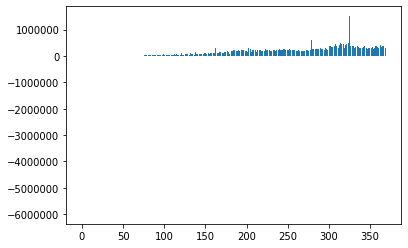

In [50]:
import matplotlib.pyplot as plt
plt.bar(days,y)

In [51]:
y=np.array(india_daily_recovery)

<BarContainer object of 370 artists>

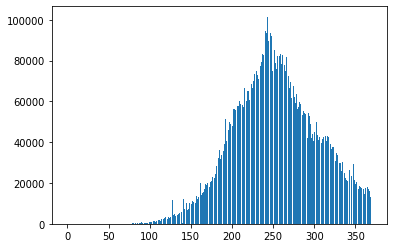

In [52]:
plt.bar(days,y)

<BarContainer object of 370 artists>

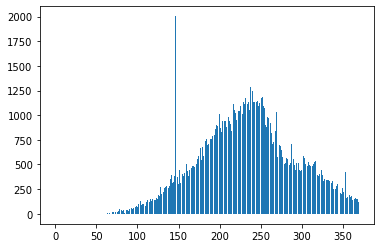

In [53]:
y=np.array(india_daily_death)
plt.bar(days,y)

<BarContainer object of 370 artists>

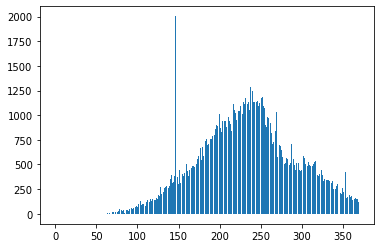

In [54]:
y=np.array(india_daily_death)
plt.bar(days,y)

In [55]:
confirmed_cases.drop(['province', 'country_code'], axis=1, inplace=True)

In [56]:
confirmed_cases

country  latest  coordinates.lat  coordinates.long  \
0           Afghanistan   54672        33.939110         67.709953   
1               Albania   72812        41.153300         20.168300   
2               Algeria  105854        28.033900          1.659600   
3               Andorra    9596        42.506300          1.521800   
4                Angola   19476       -11.202700         17.873900   
..                  ...     ...              ...               ...   
268             Vietnam    1549        14.058324        108.277199   
269  West Bank and Gaza  155884        31.952200         35.233200   
270               Yemen    2118        15.552727         48.516388   
271              Zambia   46146       -13.133897         27.849332   
272            Zimbabwe   31646       -19.015438         29.154857   

     history.1/22/20  history.1/23/20  history.1/24/20  history.1/25/20  \
0                  0                0                0                0   
1                  0                0                0                0   
2                  0                0                0                0   
3                  0                0                0                0   
4                  0                0                0                0   
..               ...              ...              ...              ...   
268                0                2                2                2   
269                0                0                0                0   
270                0                0                0                0   
271                0                0                0                0   
272                0                0                0                0   

     history.1/26/20  history.1/27/20  ...  history.1/16/21  history.1/17/21  \
0                  0                0  ...            53938            53984   
1                  0                0  ...            67216            67690   
2                  0                0  ...           103611           103833   
3                  0                0  ...             9038             9083   
4                  0                0  ...            18765            18875   
..               ...              ...  ...              ...              ...   
268                2                2  ...             1537             1537   
269                0                0  ...           151569           152031   
270                0                0  ...             2112             2112   
271                0                0  ...            36074            37605   
272                0                0  ...            26881            27203   

     history.1/18/21  history.1/19/21  history.1/20/21  history.1/21/21  \
0              54062            54141            54278            54403   
1              67982            68568            69238            69916   
2             104092           104341           104606           104852   
3               9083             9194             9308             9379   
4              18926            19011            19093            19177   
..               ...              ...              ...              ...   
268             1539             1540             1544             1546   
269           152555           153093           153590           154063   
270             2113             2115             2115             2115   
271            38207            39515            40949            42213   
272            27892            28675            29408            30047   

     history.1/22/21  history.1/23/21  history.1/24/21  history.1/25/21  
0              54483            54559            54595            54672  
1              70655            71441            72274            72812  
2             105124           105369           105596           105854  
3               9416             9499             9549             9596  
4              19269            19367     

In [57]:
confirmed_cases.dropna(how='any').shape

(272, 374)

In [58]:
italy_daily_increase

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 17,
 42,
 93,
 74,
 93,
 131,
 202,
 233,
 240,
 566,
 342,
 466,
 587,
 769,
 778,
 1247,
 1492,
 1797,
 977,
 2313,
 2651,
 2547,
 3497,
 3590,
 3233,
 3526,
 4207,
 5322,
 5986,
 6557,
 5560,
 4789,
 5249,
 5210,
 6203,
 5909,
 5974,
 5217,
 4050,
 4053,
 4782,
 4668,
 4585,
 4805,
 4316,
 3599,
 3039,
 3836,
 4204,
 3951,
 4694,
 4092,
 3153,
 2972,
 2667,
 3786,
 3493,
 3491,
 3047,
 2256,
 2729,
 3370,
 2646,
 3021,
 2357,
 2324,
 1739,
 2091,
 2086,
 1872,
 1965,
 1900,
 1389,
 1221,
 1075,
 1444,
 1401,
 1327,
 1083,
 802,
 744,
 1402,
 888,
 992,
 789,
 875,
 675,
 451,
 813,
 665,
 642,
 652,
 669,
 531,
 300,
 397,
 584,
 593,
 516,
 416,
 333,
 200,
 318,
 321,
 177,
 518,
 270,
 197,
 280,
 283,
 202,
 379,
 163,
 346,
 338,
 301,
 210,
 328,
 331,
 -148,
 264,
 224,
 221,
 113,
 577,
 296,
 255,
 175,
 174,
 126,
 142,
 182,
 201,
 223,
 235,
 192,
 208

In [59]:
india_daily_increase

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 23,
 2,
 1,
 3,
 5,
 4,
 13,
 6,
 11,
 9,
 20,
 11,
 6,
 23,
 14,
 38,
 50,
 86,
 66,
 103,
 37,
 121,
 70,
 160,
 100,
 37,
 227,
 146,
 601,
 545,
 24,
 515,
 506,
 1190,
 533,
 605,
 809,
 873,
 848,
 759,
 1248,
 1034,
 835,
 1108,
 922,
 1370,
 1893,
 924,
 1541,
 1290,
 1707,
 1453,
 1753,
 1607,
 1561,
 1873,
 1738,
 1801,
 2394,
 2442,
 2806,
 3932,
 2963,
 3587,
 3364,
 3344,
 3113,
 4353,
 3607,
 3524,
 3763,
 3942,
 3787,
 4864,
 5050,
 4630,
 6147,
 5553,
 6198,
 6568,
 6629,
 7113,
 6414,
 5843,
 7293,
 7300,
 8105,
 8336,
 8782,
 7761,
 8821,
 9633,
 9889,
 9471,
 10438,
 10864,
 8442,
 10218,
 10459,
 10930,
 11458,
 11929,
 11502,
 10667,
 10974,
 12881,
 13586,
 14516,
 15403,
 14831,
 14933,
 15968,
 16922,
 17296,
 18552,
 19906,
 19459,
 18522,
 18641,
 19160,
 20903,
 22771,
 24850,
 24248,
 22251,


In [60]:
list_of_dailyincrease = list(zip(india_daily_increase, italy_daily_increase,china_daily_increase,germany_daily_increase,spain_daily_increase,
france_daily_increase,russia_daily_increase))  

In [61]:
daily_increase_df = pd.DataFrame(list_of_dailyincrease, columns = ['india_daily_increase','italy_daily_increase','china_daily_increase','germany_daily_increase','spain_daily_increase',
'france_daily_increase','russia_daily_increase'])  


In [62]:
daily_increase_df.head(60)

india_daily_increase  italy_daily_increase  china_daily_increase  \
0                      0                     0                   548   
1                      0                     0                    95   
2                      0                     0                   277   
3                      0                     0                   486   
4                      0                     0                   669   
5                      0                     0                   802   
6                      0                     0                  2632   
7                      0                     0                   578   
8                      1                     0                  2054   
9                      0                     2                  1661   
10                     0                     0                  2089   
11                     1                     0                  4739   
12                     1                     0                  3086   
13                     0                     0                  3991   
14                     0                     0                  3733   
15                     0                     0                  3147   
16                     0                     1                  3523   
17                     0                     0                  2704   
18                     0                     0                  3015   
19                     0                     0                  2525   
20                     0                     0                  2032   
21                     0                     0                   373   
22                     0                     0                 15136   
23                     0                     0                  6463   
24                     0                     0                  2055   
25                     0                     0                  2100   
26                     0                     0                  1921   
27                     0                     0                  1777   
28                     0                     0                   408   
29                     0                     0                   458   
30                     0                    17                   473   
31                     0                    42                  1451   
32                     0                    93                    21   
33                     0                    74                   219   
34                     0                    93                   513   
35                     0                   131                   412   
36                     0                   202                   434   
37                     0                   233                   328   
38                     0                   240                   428   
39                     0                   566                   576   
40                     2                   342                   204   
41                     0                   466                   125   
42                    23                   587                   125   
43                     2                   769                   151   
44                     1                   778                   153   
45                     3                  1247                    80   
46                     5                  1492                    53   
47                     4                  1797                    37   
48                    13                   977                    27   
49                     6                  2313                    34   
50                    11                  2651                    11   
51                     9                  2547                    13   
52                    20                  3497                    32   
53                    11                  3590                    26   
54                     6                  32

In [63]:
daily_increase_df.iloc[60,:]

india_daily_increase        66
italy_daily_increase      5560
china_daily_increase       130
germany_daily_increase    2660
spain_daily_increase      3394
france_daily_increase     2295
russia_daily_increase       61
Name: 60, dtype: int64

In [64]:
daily_increase_df.tail(60)

india_daily_increase  italy_daily_increase  china_daily_increase  \
310                 41322                 28342                    98   
311                 41810                 26315                    95   
312                 38772                 20646                   133   
313                 31118                 16376                    88   
314                 36604                 19347                    91   
315                 35551                 20709                   120   
316                 36595                 23219                   108   
317                 36652                 24110                   127   
318                 36011                 21052                   119   
319                 32981                 18887                   110   
320                 26567                 13679                    93   
321                 32080                 14837                   112   
322                 31521                 12755                   116   
323                 29373                 16998                   127   
324                 30031                 18726                    99   
325                 30254                 19902                    93   
326                 27071                 17937                   111   
327                 22065                 12025                    99   
328                 26382                 14839                   110   
329                 24010                 17568                    89   
330                 22890                 18233                   108   
331                 25152                 15401                    87   
332                 26624                 16305                   132   
333                 24337                 15102                    97   
334                 19556                 10869                   100   
335                 23950                 13316                    78   
336                 24712                 13908                    70   
337                 23067                 18039                    85   
338                 22273                 19037                    77   
339                 18732                 10405                    81   
340                 20021                  8937                    91   
341                 16432                  8581                    88   
342                 20549                 11210                    77   
343                 21822                 16202                    79   
344                     0                 23477                    87   
345                 20035                 22210                    60   
346                 37256                 11825                    63   
347                 16504                 14245                    74   
348                 16375                 10798                    86   
349                 18088                 15375                    64   
350                 20346                 20326                    88   
351                 18139                 18416                    86   
352                     0                 17529                    78   
353                 36867                 19976                   128   
354                 16311                 18625                   134   
355                 12584                 12530                    96   
356                 15968                 14242                   175   
357                 16946                 15773                   180   
358                 15590                 17243                   173   
359                 15158                 16144                   168   
360                 15144                 16310                   159   
361                 13788                 12544                   164   
362                 10050                  8825                   225   
363                 13816                 10496                

In [65]:
list_of_confirmed = list(zip(india_cases, italy_cases,china_cases,germany_cases,spain_cases,france_cases))  

In [66]:
confirmed_df = pd.DataFrame(list_of_confirmed, columns = ['india_confirmed','italy_confirmed','china_confirmed','germany_confirmed','spain_confirmed',
'france_confirmed'])  

In [67]:
confirmed_df.tail(60)

india_confirmed  italy_confirmed  china_confirmed  germany_confirmed  \
310          9351109          1538217            92586            1038649   
311          9392919          1564532            92681            1052494   
312          9431691          1585178            92814            1055691   
313          9462809          1601554            92902            1069912   
314          9499413          1620901            92993            1094678   
315          9534964          1641610            93113            1117953   
316          9571559          1664829            93221            1141544   
317          9608211          1688939            93348            1157514   
318          9644222          1709991            93467            1183640   
319          9677203          1728878            93577            1194550   
320          9703770          1742557            93670            1200006   
321          9735850          1757394            93782            1229269   
322          9767371          1770149            93898            1254358   
323          9796744          1787147            94025            1287092   
324          9826775          1805873            94124            1314309   
325          9857029          1825775            94217            1336101   
326          9884100          1843712            94328            1350810   
327          9906165          1855737            94427            1357261   
328          9932547          1870576            94537            1391086   
329          9956557          1888144            94626            1423830   
330          9979447          1906377            94734            1454009   
331         10004599          1921778            94821            1486839   
332         10031223          1938083            94953            1508518   
333         10055560          1953185            95050            1514962   
334         10075116          1964054            95150            1534218   
335         10099066          1977370            95228            1570371   
336         10123778          1991278            95298            1604129   
337         10146845          2009317            95383            1630596   
338         10169118          2028354            95460            1632736   
339         10187850          2038759            95541            1646240   
340         10207871          2047696            95632            1658639   
341         10224303          2056277            95720            1672643   
342         10244852          2067487            95797            1692109   
343         10266674          2083689            95876            1741153   
344         10266674          2107166            95963            1760520   
345         10286709          2129376            96023            1762637   
346         10323965          2141201            96086            1773540   
347         10340469          2155446            96160            1783896   
348         10356844          2166244            96246            1796216   
349         10374932          2181619            96310            1814565   
350         10395278          2201945            96398            1841228   
351         10413417          2220361            96484            1886561   
352         10413417          2237890            96562            1905638   
353         10450284          2257866            96690            1928462   
354         10466595          2276491            96824            1929410   
355         10479179          2289021            96920            1941116   
356         10495147          2303263            97095            1968326   
357         10512093          2319036            97275            1993892   
358         10527683          2336279            97448            2015235   
359         10542841          2352423            97616            2023828   
360         10557985          2368733            97775            2038645   
3

In [68]:
def increase_in_daily_increase(data):
    d=[]
    for i in range(len(data)):
        if i==0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d   

In [69]:
increase_in_world_daily_increase=increase_in_daily_increase(world_daily_increase)
increase_in_china_daily_increase=increase_in_daily_increase(china_daily_increase)
increase_in_italy_daily_increase=increase_in_daily_increase(italy_daily_increase)
increase_in_us_daily_increase=increase_in_daily_increase(us_daily_increase)
increase_in_spain_daily_increase=increase_in_daily_increase(spain_daily_increase)
increase_in_france_daily_increase=increase_in_daily_increase(france_daily_increase)
increase_in_germany_daily_increase=increase_in_daily_increase(germany_daily_increase)
increase_in_uk_daily_increase=increase_in_daily_increase(uk_daily_increase)
increase_in_russia_daily_increase=increase_in_daily_increase(russia_daily_increase)
increase_in_india_daily_increase=increase_in_daily_increase(india_daily_increase)

In [70]:
increase_in_india_daily_increase

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 -1,
 0,
 1,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 -2,
 23,
 -21,
 -1,
 2,
 2,
 -1,
 9,
 -7,
 5,
 -2,
 11,
 -9,
 -5,
 17,
 -9,
 24,
 12,
 36,
 -20,
 37,
 -66,
 84,
 -51,
 90,
 -60,
 -63,
 190,
 -81,
 455,
 -56,
 -521,
 491,
 -9,
 684,
 -657,
 72,
 204,
 64,
 -25,
 -89,
 489,
 -214,
 -199,
 273,
 -186,
 448,
 523,
 -969,
 617,
 -251,
 417,
 -254,
 300,
 -146,
 -46,
 312,
 -135,
 63,
 593,
 48,
 364,
 1126,
 -969,
 624,
 -223,
 -20,
 -231,
 1240,
 -746,
 -83,
 239,
 179,
 -155,
 1077,
 186,
 -420,
 1517,
 -594,
 645,
 370,
 61,
 484,
 -699,
 -571,
 1450,
 7,
 805,
 231,
 446,
 -1021,
 1060,
 812,
 256,
 -418,
 967,
 426,
 -2422,
 1776,
 241,
 471,
 528,
 471,
 -427,
 -835,
 307,
 1907,
 705,
 930,
 887,
 -572,
 102,
 1035,
 954,
 374,
 1256,
 1354,
 -447,
 -937,
 119,
 519,
 1743,
 1868,
 2079,
 -602,
 -1997,
 502,
 2126,
 1627,
 608,
 1492,
 126,
 -234,
 931,
 3247,
 2299,

In [71]:
india_daily_increase_test=india_daily_increase[68:119]
italy_daily_increase_test=italy_daily_increase[30:81]
germany_daily_increase_test=germany_daily_increase[42:93]
spain_daily_increase_test=spain_daily_increase[42:93]
france_daily_increase_test=france_daily_increase[35:86]


italy_daily_increase_final=italy_daily_increase[81:107]
germany_daily_increase_final=germany_daily_increase[93:119]
spain_daily_increase_final=spain_daily_increase[93:119]
france_daily_increase_final=france_daily_increase[86:112]

In [72]:
india_daily_increase_test

[227,
 146,
 601,
 545,
 24,
 515,
 506,
 1190,
 533,
 605,
 809,
 873,
 848,
 759,
 1248,
 1034,
 835,
 1108,
 922,
 1370,
 1893,
 924,
 1541,
 1290,
 1707,
 1453,
 1753,
 1607,
 1561,
 1873,
 1738,
 1801,
 2394,
 2442,
 2806,
 3932,
 2963,
 3587,
 3364,
 3344,
 3113,
 4353,
 3607,
 3524,
 3763,
 3942,
 3787,
 4864,
 5050,
 4630,
 6147]

In [73]:
list_of_dailyincrease_test = list(zip(india_daily_increase_test, italy_daily_increase_test,germany_daily_increase_test,spain_daily_increase_test,
france_daily_increase_test))  

In [74]:
list_of_dailyincrease_final = list(zip(italy_daily_increase_final,germany_daily_increase_final,spain_daily_increase_final,france_daily_increase_final))  

In [75]:
daily_increase_final_df = pd.DataFrame(list_of_dailyincrease_final, columns = ['italy_daily_increase_final','germany_daily_increase_final','spain_daily_increase_final',
'france_daily_increase_final'])  

In [76]:
daily_increase_test_df = pd.DataFrame(list_of_dailyincrease_test, columns = ['india_daily_increase_test','italy_daily_increase_test','germany_daily_increase_test','spain_daily_increase_test',
'france_daily_increase_test'])  

In [77]:
daily_increase_test_df 

india_daily_increase_test  italy_daily_increase_test  \
0                         227                         17   
1                         146                         42   
2                         601                         93   
3                         545                         74   
4                          24                         93   
5                         515                        131   
6                         506                        202   
7                        1190                        233   
8                         533                        240   
9                         605                        566   
10                        809                        342   
11                        873                        466   
12                        848                        587   
13                        759                        769   
14                       1248                        778   
15                       1034                       1247   
16                        835                       1492   
17                       1108                       1797   
18                        922                        977   
19                       1370                       2313   
20                       1893                       2651   
21                        924                       2547   
22                       1541                       3497   
23                       1290                       3590   
24                       1707                       3233   
25                       1453                       3526   
26                       1753                       4207   
27                       1607                       5322   
28                       1561                       5986   
29                       1873                       6557   
30                       1738                       5560   
31                       1801                       4789   
32                       2394                       5249   
33                       2442                       5210   
34                       2806                       6203   
35                       3932                       5909   
36                       2963                       5974   
37                       3587                       5217   
38                       3364                       4050   
39                       3344                       4053   
40                       3113                       4782   
41                       4353                       4668   
42                       3607                       4585   
43                       3524                       4805   
44                       3763                       4316   
45                       3942                       3599   
46                       3787                       3039   
47                       4864                       3836   
48                       5050                       4204   
49                       4630                       3951   
50                       6147                       4694   

    germany_daily_increase_test  spain_daily_increase_test  \
0                            66                         57   
1                           220                         37   
2                           188                        141   
3                           129                        100   
4                           241                        173   
5                           136                        400   
6                           281                        622   
7                           451                        582   
8                           170                          0   
9                          1597                       2955   
10                          910                       1159   
11                         1210                       1407   
12                         1477                       2144   
13             

In [78]:
y=daily_increase_test_df['india_daily_increase_test']
y = y[:,np.newaxis]

In [79]:
daily_increase_test_df.drop('india_daily_increase_test', axis=1, inplace=True) 

In [80]:
X=daily_increase_test_df

In [81]:
X

italy_daily_increase_test  germany_daily_increase_test  \
0                          17                           66   
1                          42                          220   
2                          93                          188   
3                          74                          129   
4                          93                          241   
5                         131                          136   
6                         202                          281   
7                         233                          451   
8                         240                          170   
9                         566                         1597   
10                        342                          910   
11                        466                         1210   
12                        587                         1477   
13                        769                         1985   
14                        778                         3070   
15                       1247                         2993   
16                       1492                         4528   
17                       1797                         2365   
18                        977                         2660   
19                       2313                         4183   
20                       2651                         3930   
21                       2547                         4337   
22                       3497                         6615   
23                       3590                         6933   
24                       3233                         6824   
25                       3526                         4400   
26                       4207                         4790   
27                       5322                         4923   
28                       5986                         6064   
29                       6557                         6922   
30                       5560                         6365   
31                       4789                         4933   
32                       5249                         4031   
33                       5210                         3251   
34                       6203                         4289   
35                       5909                         5633   
36                       5974                         4885   
37                       5217                         3990   
38                       4050                         2737   
39                       4053                         2946   
40                       4782                         2218   
41                       4668                         1287   
42                       4585                         3394   
43                       4805                         2945   
44                       4316                         3699   
45                       3599                         1945   
46                       3039                         1842   
47                       3836                         1881   
48                       4204                         1226   
49                       3951                         2357   
50                       4694                         2481   

    spain_daily_increase_test  france_daily_increase_test  
0                          57                           4  
1                          37                          20  
2                         141                          19  
3                         100                          43  
4                         173                          30  
5                         400                          61  
6                         622                          21  
7                         582                          76  
8                           0                         138  
9                        2955                         190  
10                       1159                         332  
11                       1407                         177  

In [82]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()
X=sc_x.fit_transform(X)
y=sc_y.fit_transform(y)

In [83]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [84]:
from sklearn.linear_model import LinearRegression
regressor =LinearRegression()

In [85]:
from sklearn.model_selection import GridSearchCV
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(regressor,parameters, cv=3)
grid=grid.fit(x_train, y_train)

In [86]:
grid.best_params_

{'copy_X': True, 'fit_intercept': False, 'normalize': True}

In [87]:
regressor =LinearRegression(fit_intercept=True,normalize=True,copy_X=True)
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [88]:
y_pred=regressor.predict(x_test)

In [89]:
y_pred=sc_y.inverse_transform(y_pred)

In [90]:
y_pred

array([[3833.8333897 ],
       [ 787.09291997],
       [ 806.44414225],
       [1154.01554139],
       [ 898.34784659],
       [3605.61579396],
       [3358.32971892],
       [3840.35867534],
       [2532.05343681],
       [ 877.24699548],
       [4172.17982921],
       [4324.28354693],
       [3432.41349332],
       [3853.89326164],
       [4751.63367564],
       [ 903.26783781]])

In [91]:
y_test=sc_y.inverse_transform(y_test)

In [92]:
y_test

array([[1873.],
       [ 873.],
       [ 809.],
       [1541.],
       [ 601.],
       [1561.],
       [3942.],
       [2394.],
       [1753.],
       [  24.],
       [2442.],
       [4353.],
       [1607.],
       [3932.],
       [2806.],
       [1190.]])

In [93]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 895.9597604462448
Mean Squared Error: 1389921.71245579
Root Mean Squared Error: 1178.9494104734902


In [94]:
print('The r2 score is',metrics.r2_score(y_test, y_pred))

The r2 score is 0.06860129614088517


In [95]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [96]:
from sklearn.svm import SVR
model=SVR()

In [97]:
from sklearn.model_selection import GridSearchCV
parameters = {'C':[0.5,1,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5]}
grid = GridSearchCV(model,parameters, cv=3)
grid=grid.fit(x_train, y_train)

D:\Downloads\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Downloads\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Downloads\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Downloads\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

In [98]:
grid.best_params_

{'C': 8.5}

In [99]:
regressor=SVR(C=1.5,kernel='linear')
regressor.fit(x_train,y_train)

D:\Downloads\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [100]:
y_pred=regressor.predict(x_test)

In [101]:
y_pred

array([ 1.46220307, -0.96675229, -0.97658894, -0.35776315, -0.96236395,
        1.22104769,  0.82445947,  1.24304254,  0.39585209, -0.97200383,
        1.40311696,  1.35602983,  1.00067476,  1.39224042,  1.88917441,
       -0.94377518])

In [102]:
y_pred=sc_y.inverse_transform(y_pred)

In [103]:
y_pred

array([4237.46911248,  633.07695706,  618.48008498, 1536.7723064 ,
        639.58892677, 3879.61216044, 3291.1042347 , 3912.25091249,
       2655.08222322,  625.28405237, 4149.78964599, 4079.91579563,
       3552.59484296, 4133.64966062, 4871.06337553,  667.17329922])

In [104]:
y_test=sc_y.inverse_transform(y_test)

In [105]:
y_test

array([[1873.],
       [ 873.],
       [ 809.],
       [1541.],
       [ 601.],
       [1561.],
       [3942.],
       [2394.],
       [1753.],
       [  24.],
       [2442.],
       [4353.],
       [1607.],
       [3932.],
       [2806.],
       [1190.]])

In [106]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 971.5538896788075
Mean Squared Error: 1645065.4523401717
Root Mean Squared Error: 1282.6010495630244


In [107]:
print('The r2 score is',metrics.r2_score(y_test, y_pred))

The r2 score is -0.10237275692732961


In [108]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [109]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()

In [110]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[100,150,200,250,300]}
grid = GridSearchCV(model,parameters, cv=3)
grid=grid.fit(x_train, y_train)

D:\Downloads\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Downloads\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Downloads\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Downloads\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed whe

In [111]:
grid.best_params_

{'n_estimators': 150}

In [112]:
regressor=RandomForestRegressor(n_estimators=300)
regressor.fit(x_train,y_train)

D:\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [113]:
y_pred=regressor.predict(x_test)

In [114]:
y_test=sc_y.inverse_transform(y_test)
y_pred=sc_y.inverse_transform(y_pred)

In [115]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 650.5383333333339
Mean Squared Error: 657252.8774680556
Root Mean Squared Error: 810.7113404091839


In [116]:
print('The r2 score is',metrics.r2_score(y_test, y_pred))

The r2 score is 0.5595690946507953


In [117]:
daily_increase_final_df=sc_x.fit_transform(daily_increase_final_df)

In [118]:
y_final=regressor.predict(daily_increase_final_df)

In [119]:
y_final=sc_y.inverse_transform(y_final)

In [120]:
y_final

array([2493.60333333, 2747.65      , 2929.72666667, 2788.21666667,
       3935.16      , 2271.69666667, 2519.43333333, 4312.01333333,
       1569.73      , 2736.78333333, 4775.99666667, 2760.89      ,
       3371.30666667, 1639.52      , 1557.39333333,  910.01666667,
        985.33666667, 1029.86      , 1044.68      , 1581.98      ,
        837.60333333,  647.92333333,  437.45      ,  447.75      ,
        564.42      ,  738.23      ])

In [121]:
df = pd.DataFrame({'final': y_final.flatten()})

In [122]:
df

final
0   2493.603333
1   2747.650000
2   2929.726667
3   2788.216667
4   3935.160000
5   2271.696667
6   2519.433333
7   4312.013333
8   1569.730000
9   2736.783333
10  4775.996667
11  2760.890000
12  3371.306667
13  1639.520000
14  1557.393333
15   910.016667
16   985.336667
17  1029.860000
18  1044.680000
19  1581.980000
20   837.603333
21   647.923333
22   437.450000
23   447.750000
24   564.420000
25   738.230000

In [123]:
days_since_1_22= np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases=np.array(world_cases).reshape(-1,1)
india_cases=np.array(india_cases).reshape(-1,1)

In [124]:
days_since_1_22

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [125]:
days_in_future=20
future_forecast=np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates = future_forecast[:-20]

In [126]:
future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [127]:
import datetime
start='1/22/2020'
start_date= datetime.datetime.strptime(start,'%m/%d/%Y')

In [128]:
start_date

datetime.datetime(2020, 1, 22, 0, 0)

In [129]:
future_forecast_dates=[]
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [130]:
start_date + datetime.timedelta(days=2)

datetime.datetime(2020, 1, 24, 0, 0)

In [131]:
future_forecast_dates=future_forecast_dates[-20:]

In [132]:
np.set_printoptions(suppress=True)

In [133]:
X=days_since_1_22
y=world_cases


In [134]:
y

array([[     557],
       [     655],
       [     941],
       [    1433],
       [    2118],
       [    2927],
       [    5578],
       [    6167],
       [    8235],
       [    9927],
       [   12038],
       [   16787],
       [   19887],
       [   23898],
       [   27643],
       [   30803],
       [   34396],
       [   37130],
       [   40160],
       [   42769],
       [   44811],
       [   45229],
       [   60382],
       [   66909],
       [   69052],
       [   71235],
       [   73270],
       [   75152],
       [   75652],
       [   76212],
       [   76841],
       [   78602],
       [   78982],
       [   79546],
       [   80399],
       [   81376],
       [   82736],
       [   84123],
       [   86013],
       [   88394],
       [   90377],
       [   92971],
       [   95279],
       [   98090],
       [  102003],
       [  106098],
       [  110047],
       [  114219],
       [  119041],
       [  126702],
       [  132492],
       [  146879],
       [  15

In [135]:
#y= np.log1p(y)
#from sklearn.preprocessing import StandardScaler
#sc_y=StandardScaler()
#y=sc_y.fit_transform(y)

In [136]:
y

array([[     557],
       [     655],
       [     941],
       [    1433],
       [    2118],
       [    2927],
       [    5578],
       [    6167],
       [    8235],
       [    9927],
       [   12038],
       [   16787],
       [   19887],
       [   23898],
       [   27643],
       [   30803],
       [   34396],
       [   37130],
       [   40160],
       [   42769],
       [   44811],
       [   45229],
       [   60382],
       [   66909],
       [   69052],
       [   71235],
       [   73270],
       [   75152],
       [   75652],
       [   76212],
       [   76841],
       [   78602],
       [   78982],
       [   79546],
       [   80399],
       [   81376],
       [   82736],
       [   84123],
       [   86013],
       [   88394],
       [   90377],
       [   92971],
       [   95279],
       [   98090],
       [  102003],
       [  106098],
       [  110047],
       [  114219],
       [  119041],
       [  126702],
       [  132492],
       [  146879],
       [  15

In [137]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [138]:
from sklearn.svm import SVR
model=SVR()

In [139]:
from sklearn.model_selection import GridSearchCV
parameters = {'C':[0.5,1,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5],'kernel':['linear','poly']}
grid = GridSearchCV(model,parameters, cv=3)
grid=grid.fit(x_train, y_train)

D:\Downloads\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Downloads\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Downloads\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Downloads\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

In [140]:
grid.best_params_

{'C': 8.5, 'kernel': 'linear'}

In [ ]:
regressor=SVR(C=8.5,kernel='poly',degree=5,epsilon=1,gamma=0.01,shrinking=True)
regressor.fit(x_train,y_train)

In [ ]:
y_pred=regressor.predict(x_test)

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
print('The r2 score is',metrics.r2_score(y_test, y_pred))

In [ ]:
y_test

In [ ]:
y_pred

In [ ]:
y_final=regressor.predict(future_forecast)

In [ ]:
#y_final = np.e**y_final - 1

In [ ]:
#y_final=sc_y.inverse_transform(y_final)
y_final=y_final[-20:]

In [ ]:
y_final=np.array(y_final)

In [ ]:
 y_final

In [ ]:
future_forecast_dates=np.array(future_forecast_dates).reshape(-1,1)

In [ ]:
df = pd.DataFrame({'Dates': future_forecast_dates.flatten(),'final': y_final.flatten()})

In [ ]:
df

In [ ]:
world_cases

In [ ]:
india_cases

In [ ]:
us_cases

In [ ]:
india_daily_increase

In [ ]:
us_daily_increase

In [ ]:
india_deaths

In [ ]:
|